<a href="https://colab.research.google.com/github/KhoaKD59/AI-in-Class-Mr.Thinh/blob/main/DC_Motor_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Nhiệt độ trong phòng: 20
Nhiệt độ bên ngoài: 24
 nhiệt độ trong phòng là 20.0 và ngoài trời là 24.0 thì mức điều chỉnh là 23


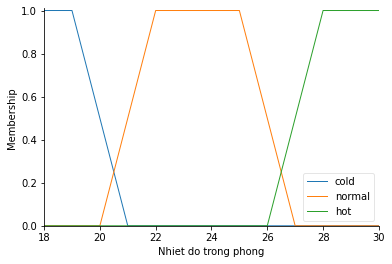

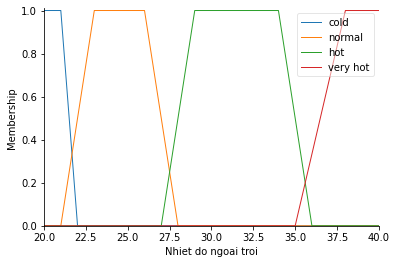

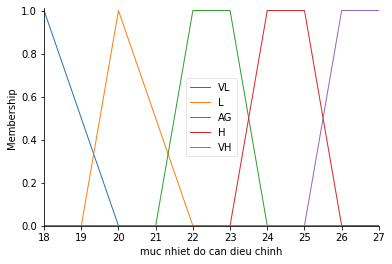

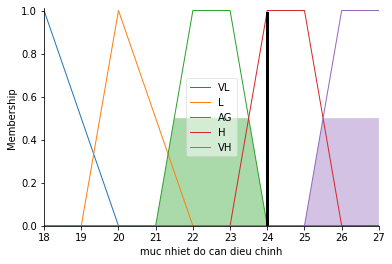

In [ ]:
!pip install scikit-learn
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#tạo 2 không gian chứ biến đầu vào và đầu ra
Y = np.arange(18,31,1)
Z = np.arange(20,41,1)
W = np.arange(18,28,1)

Tin = ctrl.Antecedent(Y, "Nhiet do trong phong")
Tout = ctrl.Antecedent(Z,"Nhiet do ngoai troi")
L = ctrl.Consequent(W,"muc nhiet do can dieu chinh")

Tin['cold'] = fuzz.trapmf(Tin.universe, [18,18,19,21])
Tin['normal'] = fuzz.trapmf(Tin.universe, [20,22,25,27])
Tin['hot'] = fuzz.trapmf(Tin.universe, [26,28,30,30])

Tin.view()

Tout['cold'] = fuzz.trapmf(Tout.universe, [20,20,21,22])
Tout['normal'] = fuzz.trapmf(Tout.universe, [21,23,26,28])
Tout['hot'] = fuzz.trapmf(Tout.universe, [27,29,34,36])
Tout['very hot'] = fuzz.trapmf(Tout.universe, [35,38,40,40])

Tout.view()

#Mức điều chỉnh
L["VL"] = fuzz.trimf(L.universe, [18,18,20])
L["L"] = fuzz.trimf(L.universe, [19,20,22])
L["AG"] = fuzz.trapmf(L.universe, [21,22,23,24])
L["H"] = fuzz.trapmf(L.universe, [23,24,25,26])
L["VH"] = fuzz.trapmf(L.universe, [25,26,27,27])

L.view()



R1_2 = ctrl.Rule(Tin["cold"] & (Tout["cold"] | Tout["normal"]), L["VH"] )
R3_4 = ctrl.Rule( Tin["cold"] & (Tout["hot"] | Tout["very hot"]), L["H"] )
R5 = ctrl.Rule( Tin["normal"] & Tout["cold"], L["VH"] )
R6_7 = ctrl.Rule(Tin["normal"] & (Tout["normal"] | Tout["hot"]), L["H"] )
R8 = ctrl.Rule(Tin["normal"] & Tout["very hot"], L["AG"] )
R9 = ctrl.Rule(Tin["hot"] & Tout["cold"], L["H"] )
R10_11 = ctrl.Rule(Tin["hot"] & (Tout["normal"] | Tout["hot"]), L["AG"] )
R12 = ctrl.Rule(Tin["hot"] & Tout["very hot"], L["L"] )
R13_14 = ctrl.Rule(Tin["cold"] & (Tout["cold"] | Tout["normal"]), L["VH"] )
R15 = ctrl.Rule(Tin["cold"] & Tout["hot"], L["H"] )
R16 = ctrl.Rule(Tin["cold"] & Tout["very hot"], L["AG"] )
R17 = ctrl.Rule(Tin["normal"] & Tout["cold"], L["H"] )
R18 = ctrl.Rule(Tin["normal"] & Tout["normal"], L["AG"] )
R19_20 = ctrl.Rule(Tin["normal"] & (Tout["hot"] | Tout["very hot"]), L["L"] )
R21 = ctrl.Rule(Tin["hot"] & Tout["cold"], L["H"] )
R22 = ctrl.Rule(Tin["hot"] & Tout["normal"], L["AG"] )
R23_24 = ctrl.Rule(Tin["hot"] & (Tout["hot"] | Tout["very hot"]), L["L"] )

R25 = ctrl.Rule(Tin["cold"] & Tout["cold"], L["H"] )
R26_27 = ctrl.Rule(Tin["cold"] & (Tout["normal"] | Tout["hot"] ), L["AG"])
R28 = ctrl.Rule(Tin["cold"] & Tout["very hot"], L["L"] )
R29_30 = ctrl.Rule(Tin["normal"] & (Tout["cold"] | Tout["normal"] ), L["AG"] )
R31_32 = ctrl.Rule(Tin["normal"] & (Tout["hot"] | Tout["very hot"]), L["L"] )
R33 = ctrl.Rule(Tin["hot"] & Tout["cold"], L["AG"] )
R34_35 = ctrl.Rule(Tin["hot"] & (Tout["normal"] | Tout["hot"]), L["L"] )
R36 = ctrl.Rule(Tin["hot"] & Tout["very hot"], L["VL"] )
R37_38 = ctrl.Rule(Tin["cold"] & (Tout["cold"] | Tout["normal"]), L["AG"])
R39_40 = ctrl.Rule(Tin["cold"] & (Tout["hot"] | Tout["very hot"]), L["L"] )
R41 = ctrl.Rule(Tin["normal"] & Tout["cold"], L["AG"] )
R42_43 = ctrl.Rule(Tin["normal"] & (Tout["normal"] | Tout["hot"]), L["L"] )
R44 = ctrl.Rule(Tin["normal"] & Tout["very hot"], L["VL"] )
R45_46 = ctrl.Rule(Tin["hot"] & (Tout["cold"] | Tout["normal"]), L["L"] )
R47_48 = ctrl.Rule(Tin["hot"] & (Tout["hot"] | Tout["very hot"]), L["VL"])


rules =[R1_2,R3_4,R5,R6_7,R8,R9,R10_11,R12,R13_14,R15,R16,R17,R18,R19_20,R21,R22,R23_24,R25,R26_27,R28,R29_30,R31_32,R33,R34_35,R36,R37_38,R39_40,R41,R42_43,R44,R45_46,R47_48]
model = ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules))

iTin = float( input("Nhiệt độ trong phòng: "))
iTout = float( input("Nhiệt độ bên ngoài: "))
##oL = float(model.output["Muc dieu chinh"] )
model.input["Nhiet do trong phong"] = iTin
model.input["Nhiet do ngoai troi"] = iTout

model.compute()
oL = model.output["muc nhiet do can dieu chinh"]
L.view(model)
print( " nhiệt độ trong phòng là %.1f và ngoài trời là %.1f thì mức điều chỉnh là %d" % (iTin,iTout,oL) )
